# Predictions

In the main notebook, we trained different models, where the dependent variable `estimated_total_comprehensive_cost`. In this notebook, we will use that model to predict based on new data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from utils.utils import Pickler

In [2]:
models, features = Pickler('./data/models.pkl').load()
numeric_cols, categorical_cols, scaler = Pickler('./data/scaler.pkl').load()

In [3]:
print(f"Number of features: {len(features)}")

Number of features: 27


# Example

In [4]:
df = pd.read_csv('./data/austin_car_crash_cleaned.csv')
row = np.random.randint(0, df.shape[0])
example = df[features].iloc[row].copy()
print(example)

fatal_crash                              False
speed_limit                               45.0
sus_serious_injry_cnt                        0
nonincap_injry_cnt                           0
poss_injry_cnt                               3
non_injry_cnt                                0
unkn_injry_cnt                               0
motor_vehicle_death_count                    0
motor_vehicle_serious_injury_count           0
bicycle_death_count                          0
bicycle_serious_injury_count                 0
pedestrian_death_count                       0
pedestrian_serious_injury_count              0
motorcycle_death_count                       0
motorcycle_serious_injury_count              0
other_death_count                            0
other_serious_injury_count                   0
micromobility_serious_injury_count           0
micromobility_death_count                    0
severity_killed                          False
severity_not_injured                     False
severity_unkn

In [5]:
print(f"Comprehensive Cost: {df['estimated_total_comprehensive_cost'].iloc[row]}")

Comprehensive Cost: 600000


# New Feature

In [6]:
# Change the values of the features
example['fatal_crash'] = False

# Scale

In [7]:
# Extract only numeric features from the example
example_numeric = example[numeric_cols].values.reshape(1, -1)  # Filter numeric columns and reshape

# Scale the numeric features
example_scaled = scaler.transform(example_numeric)

# Combine scaled numeric features with the original categorical features
new_prediction = example.copy()
new_prediction[numeric_cols] = example_scaled[0]  # Replace numeric columns with scaled values

print(new_prediction)

fatal_crash                          -0.074608
speed_limit                          -0.071012
sus_serious_injry_cnt                -0.162936
nonincap_injry_cnt                   -0.442894
poss_injry_cnt                        3.493422
non_injry_cnt                        -1.115118
unkn_injry_cnt                       -0.284014
motor_vehicle_death_count            -0.048864
motor_vehicle_serious_injury_count   -0.132135
bicycle_death_count                  -0.011208
bicycle_serious_injury_count         -0.031244
pedestrian_death_count               -0.041657
pedestrian_serious_injury_count      -0.059496
motorcycle_death_count               -0.029972
motorcycle_serious_injury_count      -0.070738
other_death_count                          0.0
other_serious_injury_count           -0.004236
micromobility_serious_injury_count         0.0
micromobility_death_count                  0.0
severity_killed                      -0.074608
severity_not_injured                 -0.944844
severity_unkn

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# Results

In [8]:
# Ensure new_prediction is a DataFrame with a single row
new_prediction_df = new_prediction.to_frame().T if isinstance(new_prediction, pd.Series) else new_prediction

# Use the DataFrame for prediction
results = {}
for model in models:
    print(f"Predicting with {model} model...")
    predictions = models[model].predict(new_prediction_df)
    result = predictions[0]
    results[model] = result
    print(f"The {model} model predicted: {result}")
    print()

Predicting with linear_regression model...
The linear_regression model predicted: 6.00321433905154

Predicting with ridge_regression model...
The ridge_regression model predicted: 6.00313832313093

Predicting with lasso_regression model...
The lasso_regression model predicted: 5.7220517112914475

Predicting with decision_tree_regressor model...
The decision_tree_regressor model predicted: 6.0272727272727264

Predicting with random_forest_regressor model...
The random_forest_regressor model predicted: 6.056377276739041

Predicting with svr model...
The svr model predicted: 6.07769416603246

Predicting with k_neighbors_regressor model...
The k_neighbors_regressor model predicted: 6.068830492294925



# Visualization

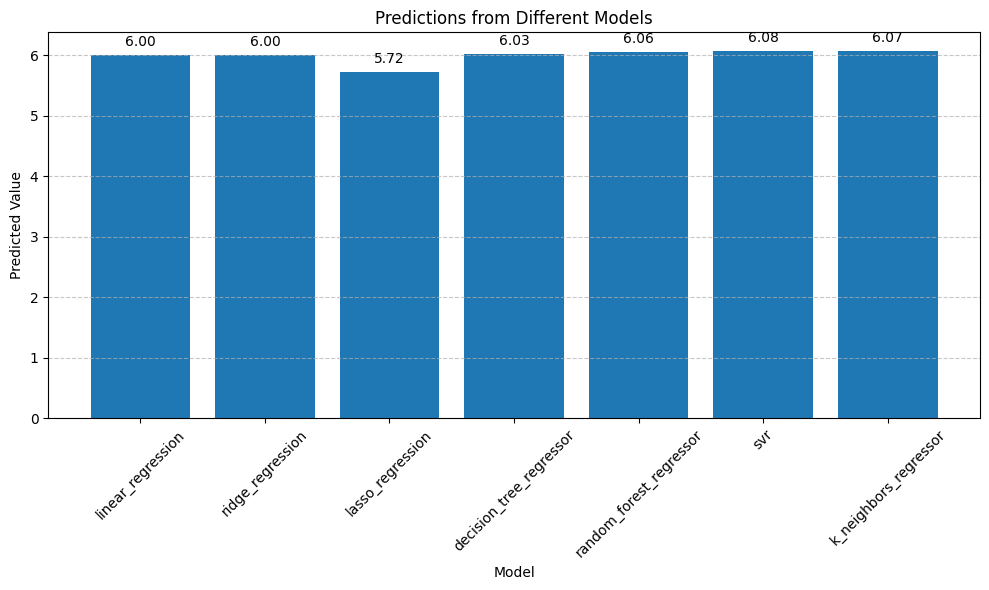

In [9]:
plt.figure(figsize=(10, 6))
plt.bar(results.keys(), results.values())
plt.xlabel('Model')
plt.ylabel('Predicted Value')
plt.title('Predictions from Different Models')

for i, v in enumerate(results.values()):
    plt.text(i, v + 0.1, str(f"{v:.2f}"), ha='center', va='bottom')

# plt.ylim(0, max(results.values()) + 10000)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('./image/predictions.png')
plt.show()